In [44]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input, Dense
from keras.optimizers import RMSprop
from keras import backend as K
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

def plot_traincurve(history):
    colors = {'loss':'r', 'acc':'b', 'val_loss':'m', 'val_acc':'g'}
    plt.figure(figsize=(10,6))
    plt.title("Training Curve") 
    plt.xlabel("Epoch")

    for measure in history.keys():
        color = colors[measure]
        ln = len(history[measure])
        plt.plot(range(1,ln+1), history[measure], color + '-', label=measure)  # use last 2 values to draw line

    plt.legend(loc='upper left', scatterpoints = 1, frameon=False)

# Neural network original data

(60000, 'train samples')
(10000, 'test samples')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [=============

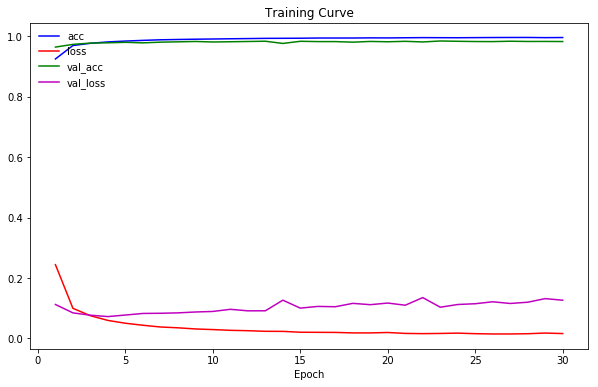

In [12]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_traincurve(history.history)

# Autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.3714 - val_loss: 0.2710
Epoch 2/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.2639 - val_loss: 0.2529
Epoch 3/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.2421 - val_loss: 0.2293
Epoch 4/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.2219 - val_loss: 0.2123
Epoch 5/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.2073 - val_loss: 0.1997
Epoch 6/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1961 - val_loss: 0.1898
Epoch 7/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1873 - val_loss: 0.1820
Epoch 8/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1802 - val_loss: 0.1755
Epoch 9/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.1742 - val_loss: 0.1701
Epoch

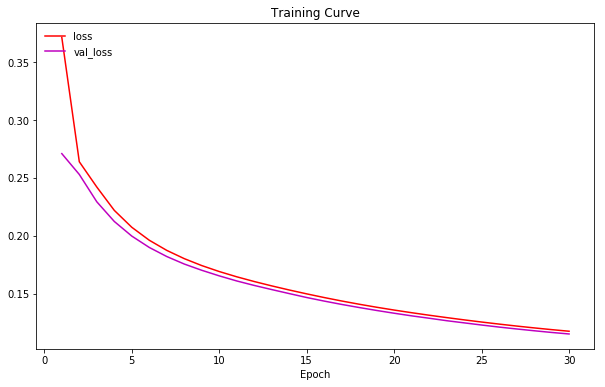

In [13]:
# this is the size of our encoded representations
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
plot_traincurve(history.history)

encoded_imgs_train = encoder.predict(x_train)
encoded_imgs_test = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs_test)

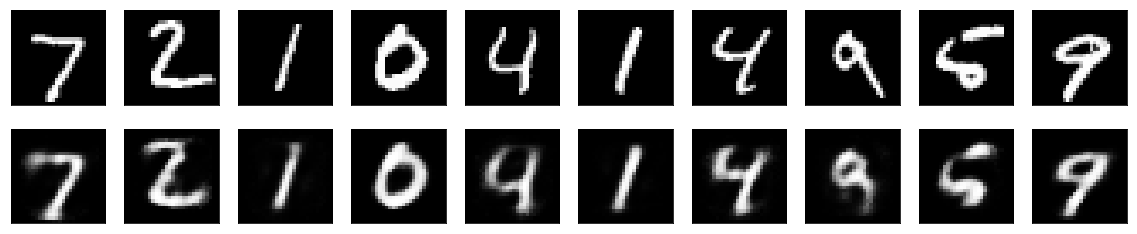

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Neural network encoded data

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               16896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 284,682
Trainable params: 284,682
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 49us/step - loss: 0.5864 

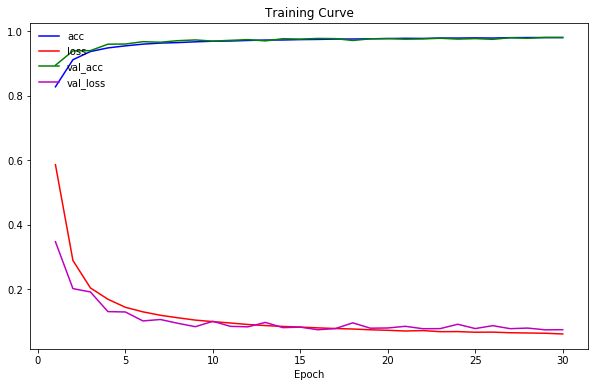

In [15]:
encoded_imgs_train_normalized = encoded_imgs_train / np.max(encoded_imgs_train)
encoded_imgs_test_normalized = encoded_imgs_test / np.max(encoded_imgs_test)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(encoding_dim,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(encoded_imgs_train_normalized, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(encoded_imgs_test_normalized, y_test))
score = model.evaluate(encoded_imgs_test_normalized, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_traincurve(history.history)

# Logistic Regression original data

In [52]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, np.argmax(y_train, axis=1))
score = logisticRegr.score(x_test, np.argmax(y_test, axis=1))
print(score)

0.9201


# Logistic Regression encoded data

In [53]:
logisticRegr = LogisticRegression()
logisticRegr.fit(encoded_imgs_train_normalized, np.argmax(y_train, axis=1))
score = logisticRegr.score(encoded_imgs_test_normalized, np.argmax(y_test, axis=1))
print(score)

0.8746


# SVM original data

In [54]:
clf_svm = LinearSVC()
clf_svm.fit(x_train, np.argmax(y_train, axis=1))
y_pred_svm = clf_svm.predict(x_test)
acc_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
print "Linear SVM accuracy: ",acc_svm

Linear SVM accuracy:  0.9183


# SVM encoded data

In [55]:
clf_svm = LinearSVC()
clf_svm.fit(encoded_imgs_train_normalized, np.argmax(y_train, axis=1))
y_pred_svm = clf_svm.predict(encoded_imgs_test_normalized)
acc_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
print "Linear SVM accuracy: ",acc_svm

Linear SVM accuracy:  0.8804


# Random Forest original data

In [56]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, np.argmax(y_train, axis=1))
y_pred_rf = clf_rf.predict(x_test)
acc_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_rf)
print "random forest accuracy: ",acc_rf

random forest accuracy:  0.9471


# Random Forest encoded data

In [57]:
clf_rf = RandomForestClassifier()
clf_rf.fit(encoded_imgs_train_normalized, np.argmax(y_train, axis=1))
y_pred_rf = clf_rf.predict(encoded_imgs_test_normalized)
acc_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_rf)
print "random forest accuracy: ",acc_rf

random forest accuracy:  0.9182
